In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [2]:
pose_csv = '/Users/kaycei/K on Server (NoMachine)/KayCei/AD6-D2/videos/071823-rt bilateral sham/VideoOutputCamera 0-18072023-103738DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(117463, 12)


In [3]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
/Users/kaycei/K on Server (NoMachine)/KayCei/AD6-D2/videos/071823-rt bilateral sham


### original data table

In [4]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               338.041565  538.869263   
3                                               343.907745  544.781982   
6                                               350.672119  544.503174   
9                                               347.928375  525.826233   
12                                              348.007202  515.792480   
15                                              347.257721  511.263214   
18                                              347.469696  511.528412   
21                                              341.596436  506.461029   
24                                              340.100983  506.340240   
27                                              340.393372  503.025665   
30                                              342.562653  500.553284   
33                                              337.582733  500.025238   
36                                              316.696228  506.218750   
39                                              297.131989  510.110077   
42                                              280.701935  510.171509   
45                                              263.602112  511.164642   
48                                              256.790863  502.037537   
51                                              258.166168  494.259491   
54                                              259.942566  491.295349   
57                                              262.102325  489.429993   
60                                              267.290955  516.760986   
63                                              268.662933  534.975769   
66                                              263.275818  564.167053   
69                                              263.906464  579.846191   
72                                              266.098938  584.600647   
75                                              268.019196  586.410645   
78                                              267.971863  591.716125   
81                                              268.499237  590.926270   
84                                              258.662781  573.183533   
87                                              280.191742  595.615906   
90                                              268.868042  592.402954   
93                                              280.978363  594.966003   
96                                              279.140228  595.760315   
99                                              278.205811  594.610229   
102                                             276.871216  595.825073   
105                                             275.652802  594.764099   
108                                             273.710266  596.799072   
111                                             269.378784  595.468445   
114                                             267.820892  594.897461   
117                                             267.731201  590.263916   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.999520    294.579926  559.862732   0.999886   322.390869   
3           1.000000    296.198242  556.989380   0.999886   318.002014   
6           0.998779    310.806885  546.925415   0.999977   321.917023   
9           0.992910    308.581970  543.685303   0.999947   342.396942   
12          0.013973    309.204803  544.061035   0.999722   340.465149   
15          0.004310    308.273102  543.193848   0.999865   340.569794   
18          0.001941    308.367920  543.306580   0.999788   340.889374   
21          0.003485    307.841370  544.024902   0.999339   341.053314   
24 

### after removing likelihood and headers

In [5]:
pose[:5, :]

array([[338.04156494, 538.8692627 , 294.57992554, 559.86273193,
        322.39086914, 557.02282715, 291.24649048, 597.0881958 ,
        340.15505981, 582.05456543, 329.33538818, 605.42376709],
       [340.81484985, 542.39343262, 295.4630127 , 560.93414307,
        317.6317749 , 560.15484619, 291.30700684, 596.2822876 ,
        338.50222778, 579.4942627 , 314.51489258, 605.36260986],
       [343.91204834, 544.77380371, 296.19769287, 556.94842529,
        317.96212769, 560.21246338, 291.73098755, 597.34558105,
        339.20257568, 581.21801758, 314.32720947, 605.3458252 ],
       [343.90774536, 544.78198242, 296.19824219, 556.98937988,
        318.00201416, 560.20098877, 291.68539429, 597.29364014,
        339.18075562, 581.25494385, 314.22363281, 605.35876465],
       [344.29995728, 546.37097168, 310.57336426, 548.36676025,
        321.90234375, 559.31896973, 288.40151978, 595.66607666,
        340.89266968, 580.96289062, 317.07992554, 605.17004395]])

### plot

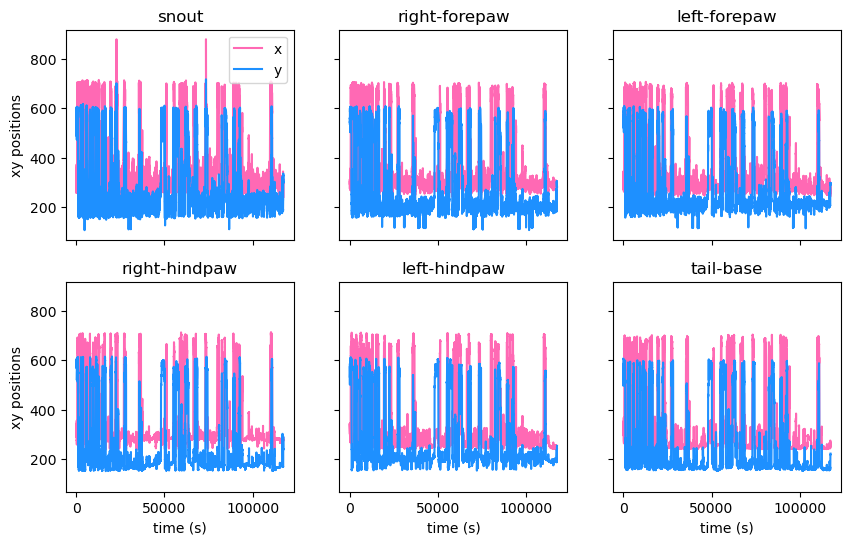

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [7]:
np.save('../processed_data/pose_video_exp_16.npy', pose)